# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

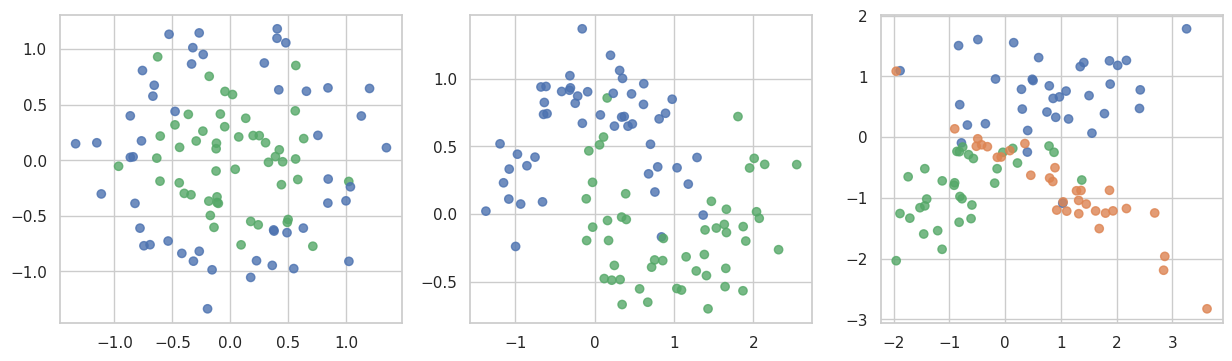

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

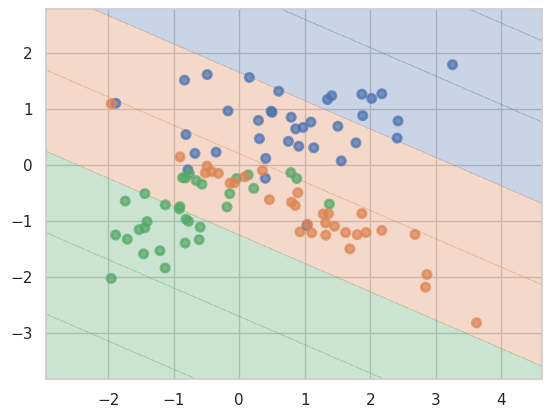

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

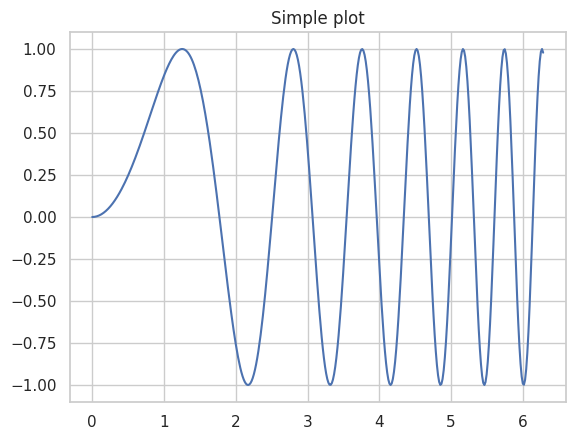

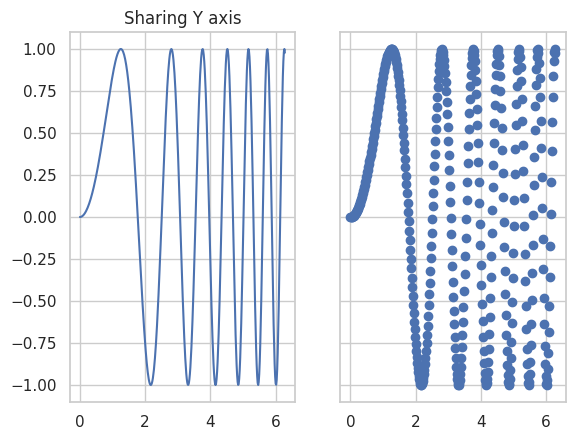

In [7]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

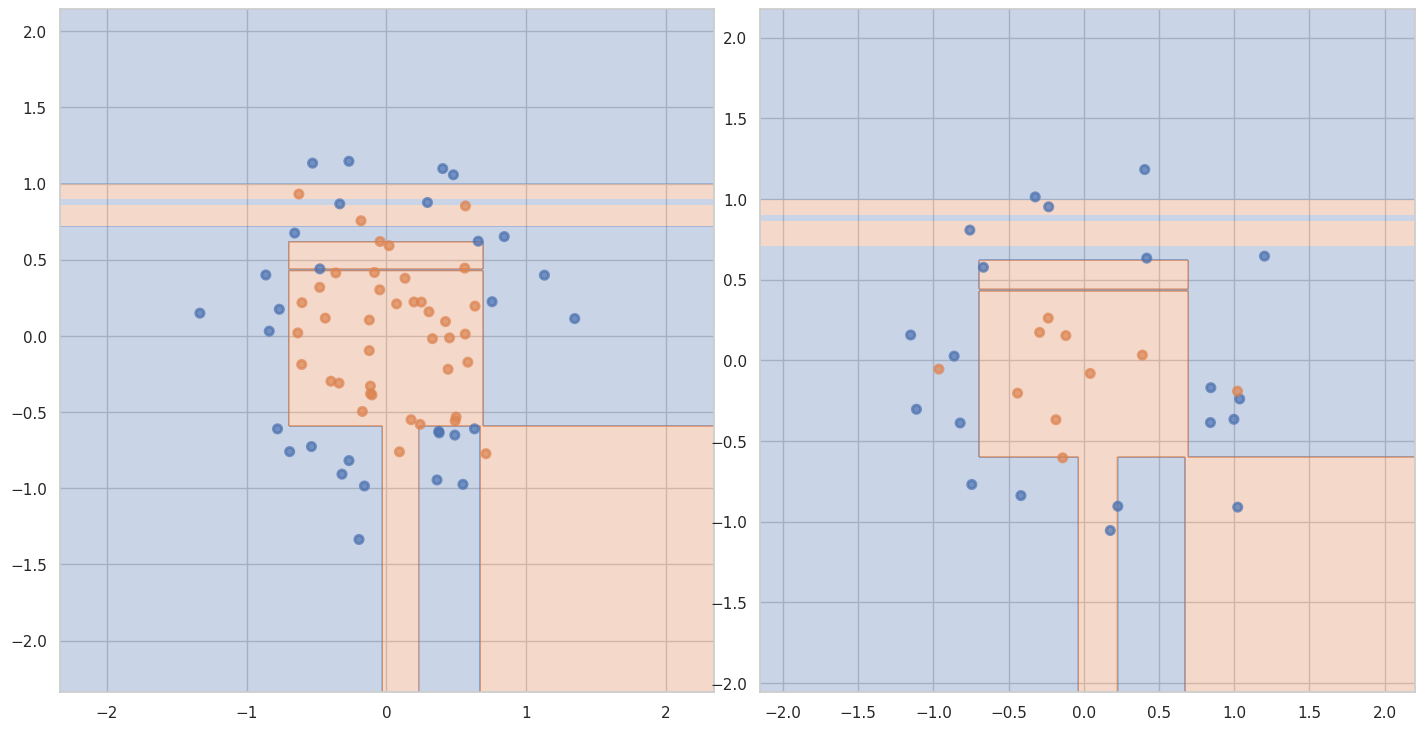

train_acc: 1.0 test_acc: 0.7


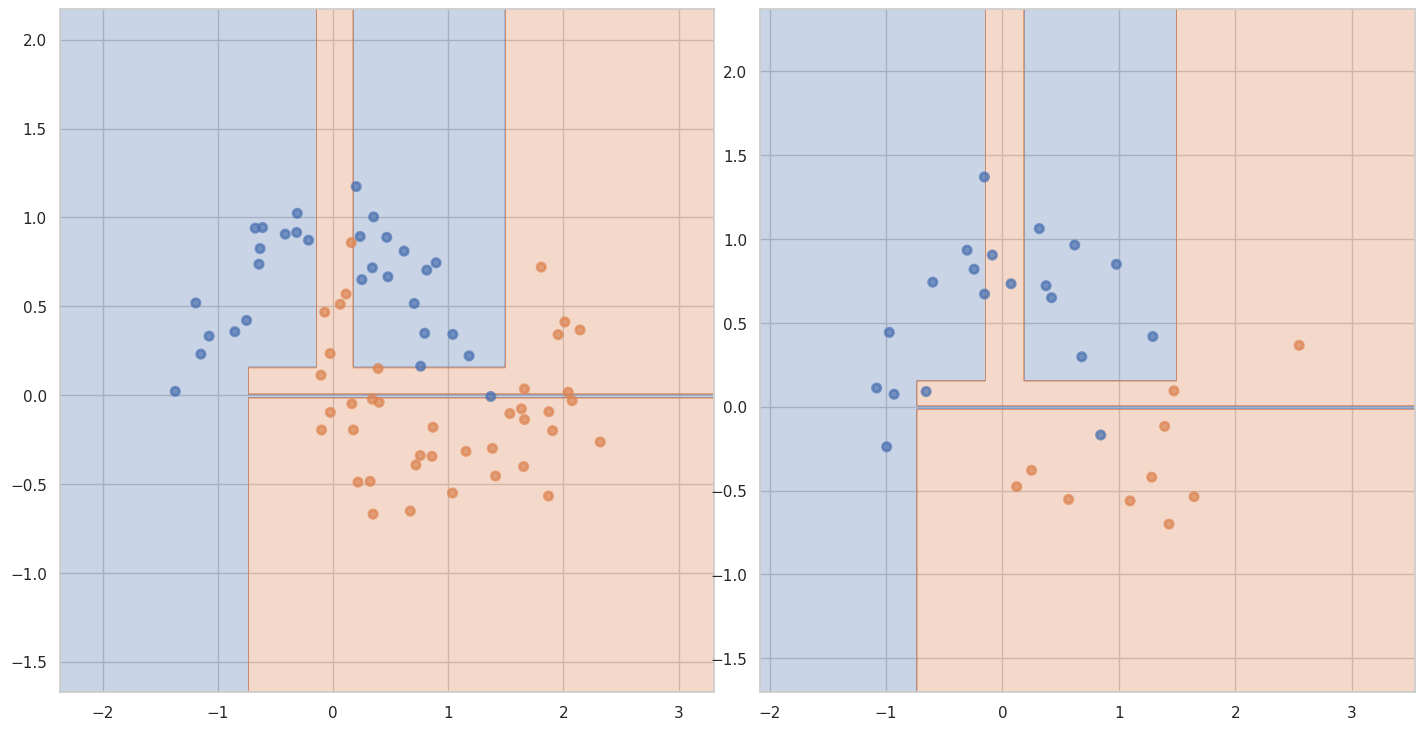

train_acc: 1.0 test_acc: 0.8666666666666667


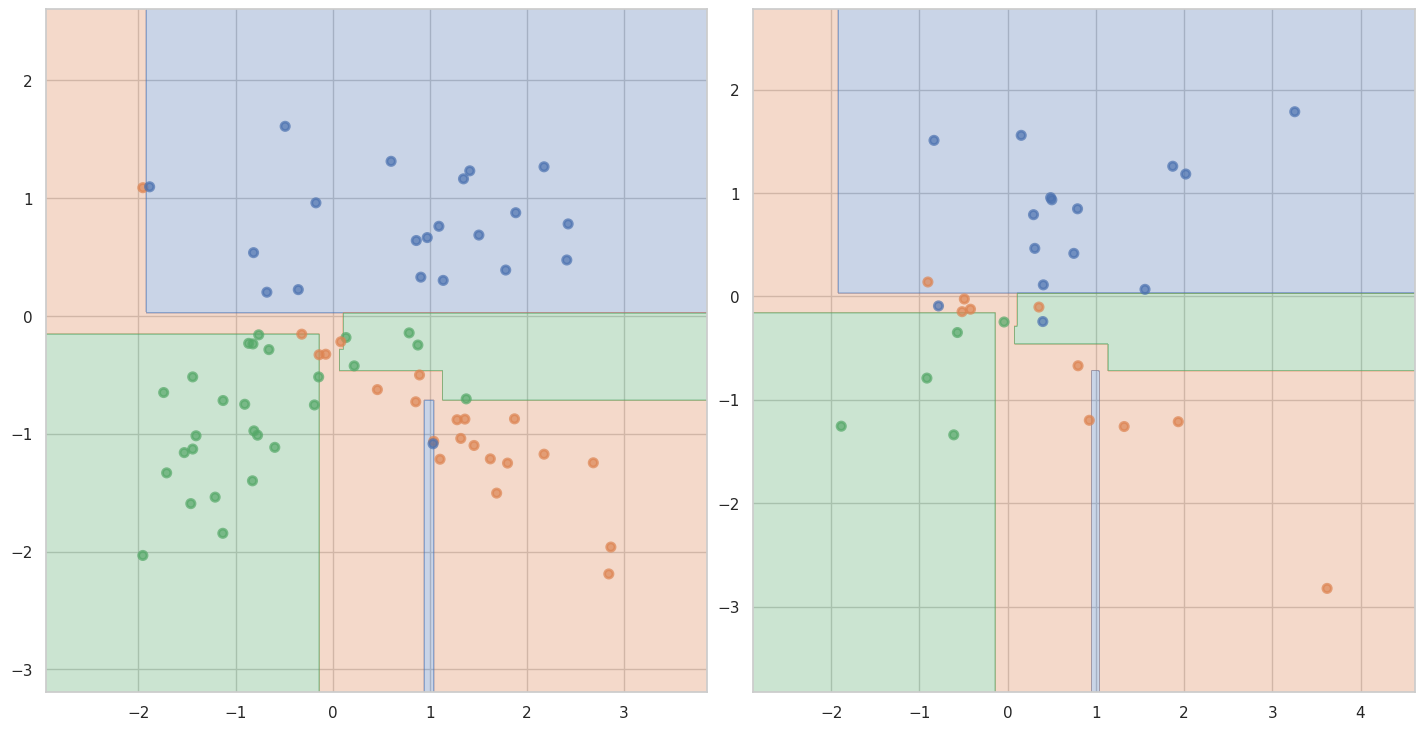

train_acc: 1.0 test_acc: 0.8333333333333334


In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.metrics import accuracy_score

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

    plt.figure(figsize=(15, 8))

    DecTree = DecisionTreeClassifier().fit(X_train, y_train)


    plt.subplot2grid((1, 2), (0, 0))
    plot_surface(DecTree, X_train, y_train)

    plt.subplot2grid((1, 2), (0, 1))
    plot_surface(DecTree, X_test, y_test)
    plt.show()

    print("train_acc:", accuracy_score(y_train, DecTree.predict(X_train)),
          "test_acc:", accuracy_score(y_test, DecTree.predict(X_test)))

__Ответ:__accuracy на тренировочной - стабильно 1.0, а на тренировочкой колеблется от 0,76 до 0,86, что также неплохо.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth: 1 min_samples_leaf: 1
train_acc: 0.7285714285714285 test_acc: 0.4666666666666667


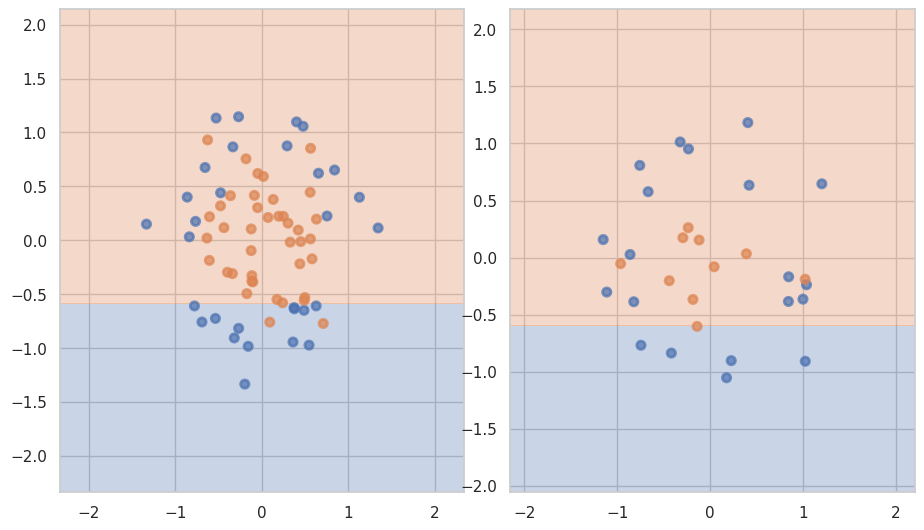

max_depth: 1 min_samples_leaf: 2
train_acc: 0.7285714285714285 test_acc: 0.4666666666666667


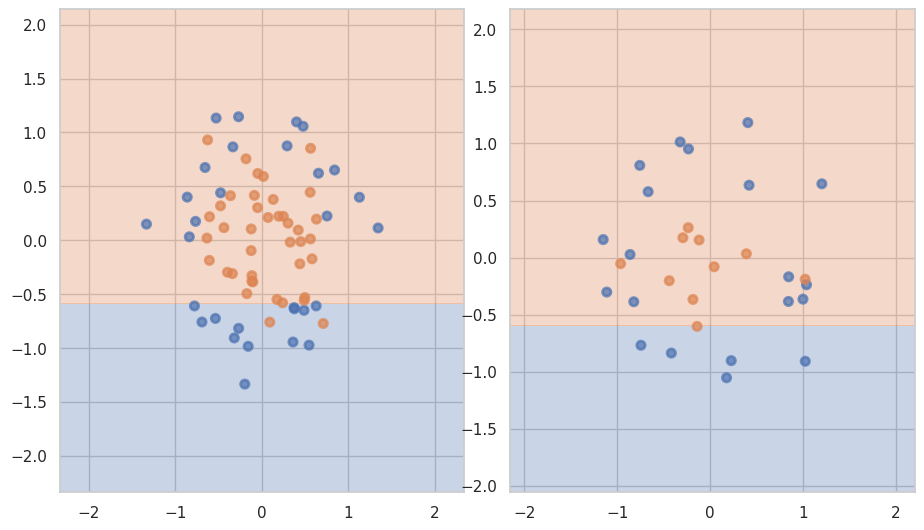

max_depth: 2 min_samples_leaf: 1
train_acc: 0.8285714285714286 test_acc: 0.6333333333333333


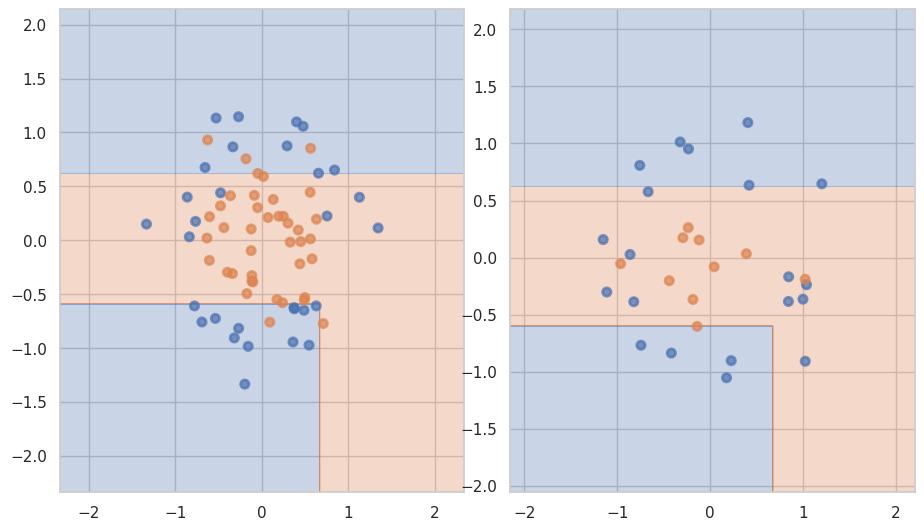

max_depth: 2 min_samples_leaf: 2
train_acc: 0.8142857142857143 test_acc: 0.6666666666666666


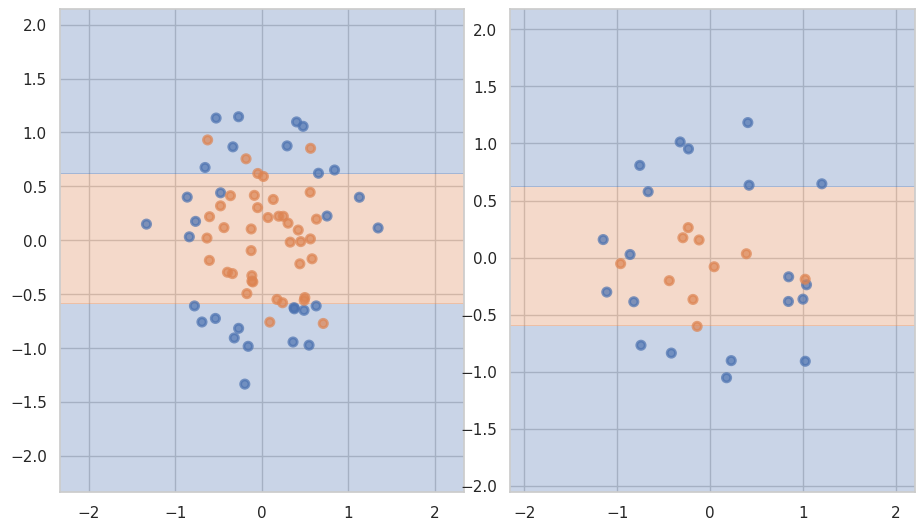

max_depth: 1 min_samples_leaf: 1
train_acc: 0.8428571428571429 test_acc: 0.8


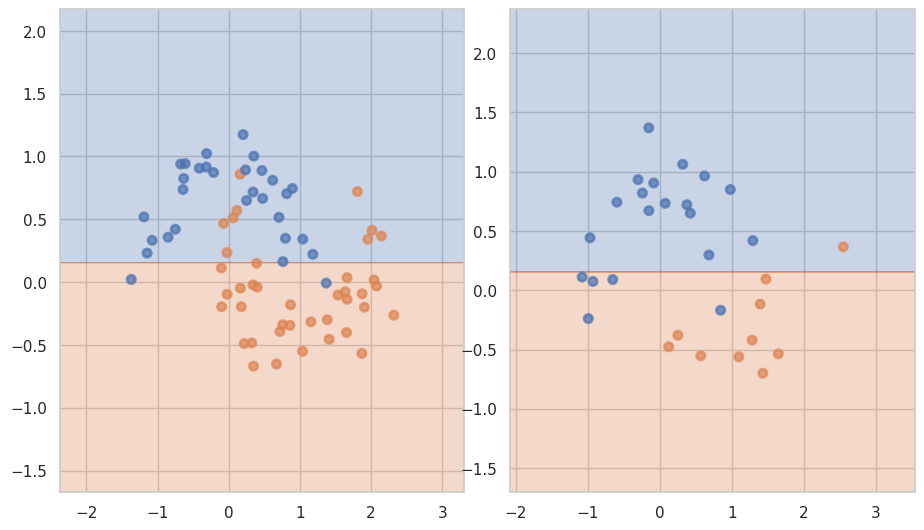

max_depth: 1 min_samples_leaf: 2
train_acc: 0.8428571428571429 test_acc: 0.8


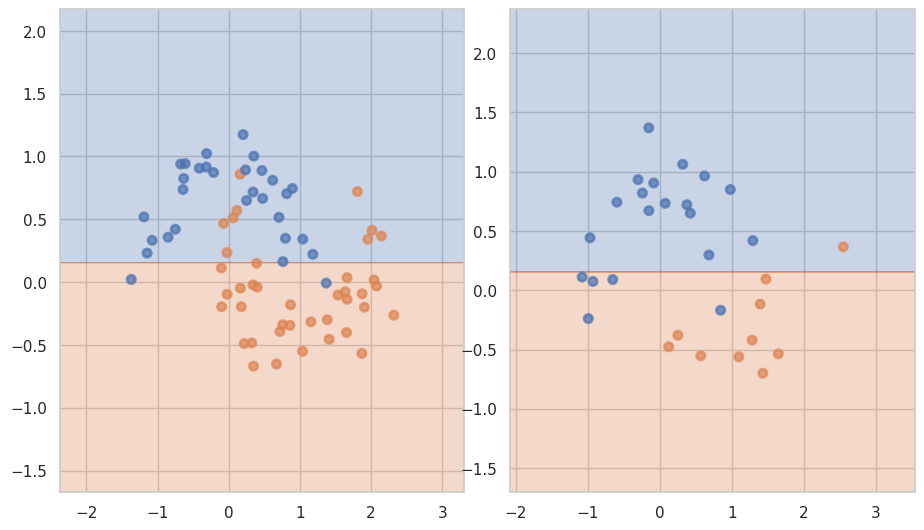

max_depth: 2 min_samples_leaf: 1
train_acc: 0.9142857142857143 test_acc: 0.9333333333333333


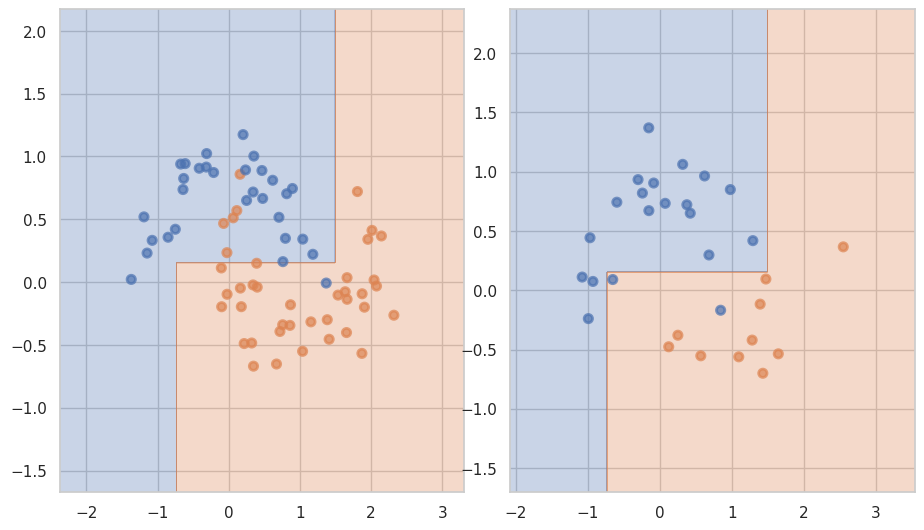

max_depth: 2 min_samples_leaf: 2
train_acc: 0.9 test_acc: 0.8333333333333334


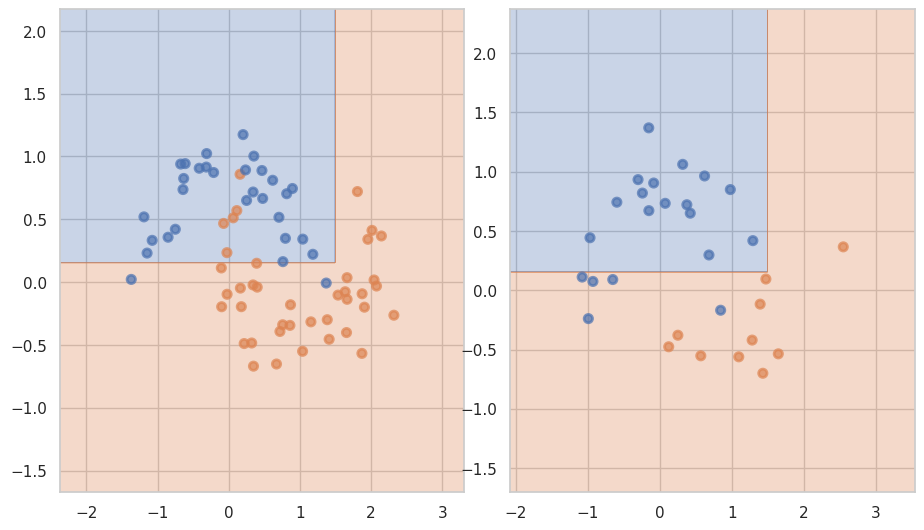

max_depth: 1 min_samples_leaf: 1
train_acc: 0.6714285714285714 test_acc: 0.6


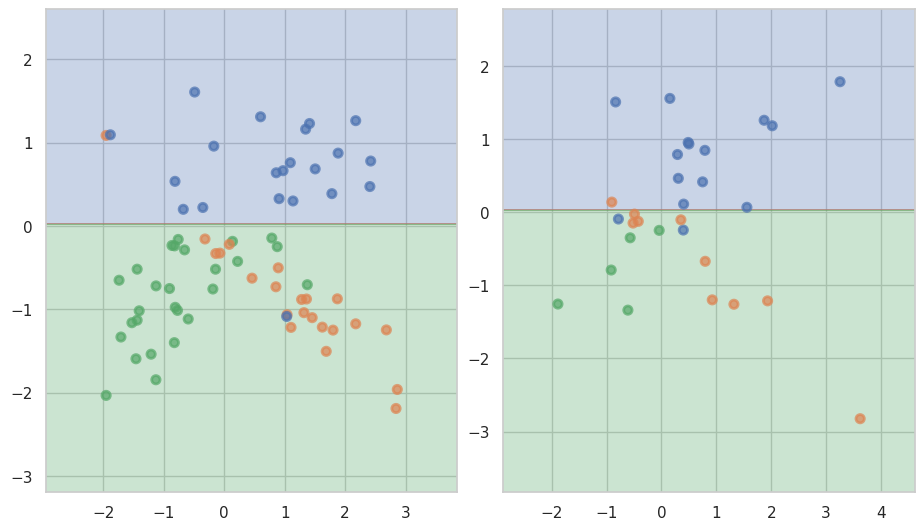

max_depth: 1 min_samples_leaf: 2
train_acc: 0.6714285714285714 test_acc: 0.6


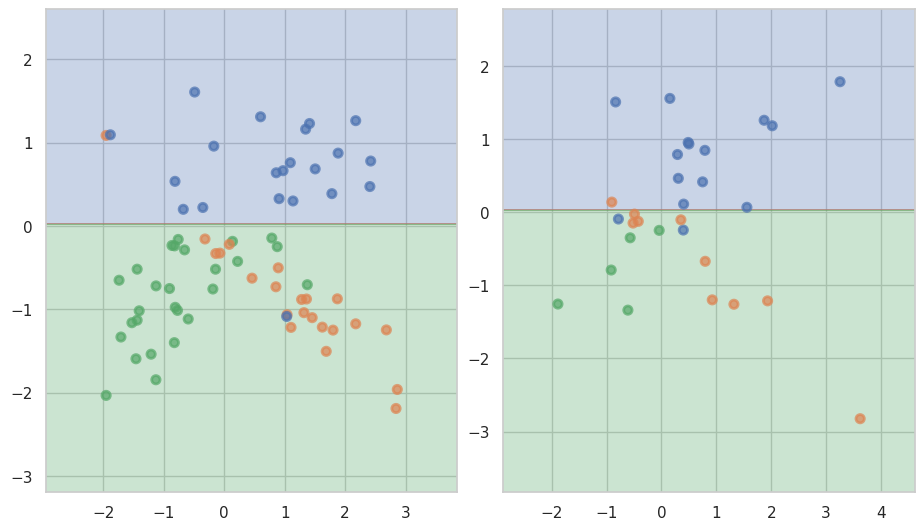

max_depth: 2 min_samples_leaf: 1
train_acc: 0.9 test_acc: 0.7666666666666667


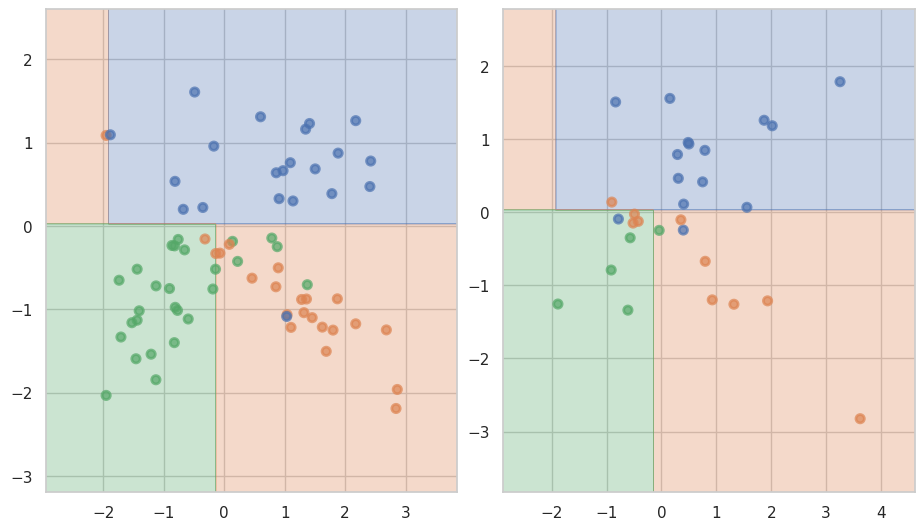

max_depth: 2 min_samples_leaf: 2
train_acc: 0.8857142857142857 test_acc: 0.7666666666666667


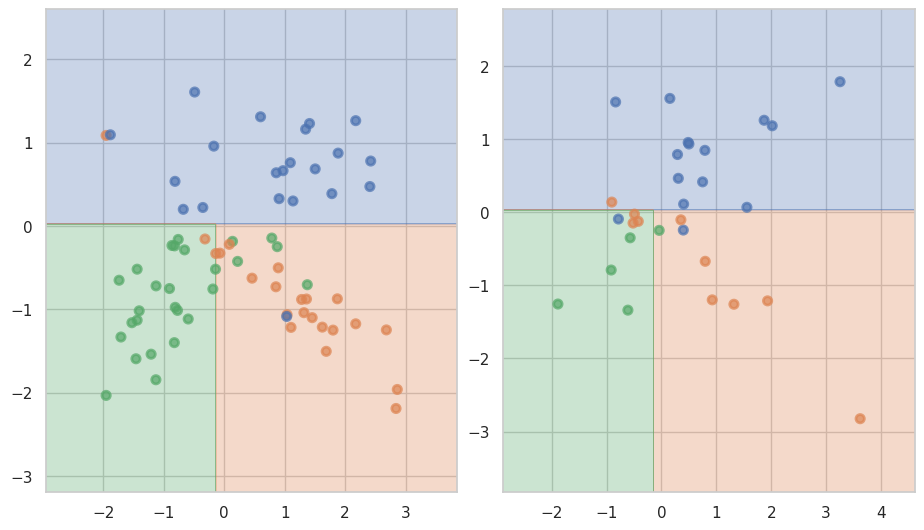

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


for i, (x, y) in enumerate(datasets):
    for max_d in range(1, 3):
        for min_s in range(1, 3):

            plt.figure(figsize=(10, 6))

            X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
            print("max_depth:", max_d, "min_samples_leaf:", min_s)

            DecTree = DecisionTreeClassifier(max_depth=max_d, min_samples_leaf=min_s).fit(X_train,y_train)

            print("train_acc:", accuracy_score(y_train, DecTree.predict(X_train)),
                  "test_acc:", accuracy_score(y_test, DecTree.predict(X_test)))

            plt.subplot2grid((1, 2), (0, 0))
            plot_surface(DecTree, X_train, y_train)


            plt.subplot2grid((1, 2), (0, 1))
            plot_surface(DecTree, X_test, y_test)
            plt.show()

__Ответ:__ так или иначе, мы всё равно видим переобучение. Очевидно, это происходит из-за того, что деревья доходят до каждого листика и ограничивают одинарные объекты. В целом, увеличение гиперпараметров идёт на пользу, но из-за переобучения мы наблюдаем, как те самые одинарные области далеко не подходят для нашей тестовой выборки. Соответственно, падает метрика. Влияет на разные классы по разному. Можно заметить, что с увеличением количества классов переобучение наступает значительно раньше.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
df = pd.read_csv('students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


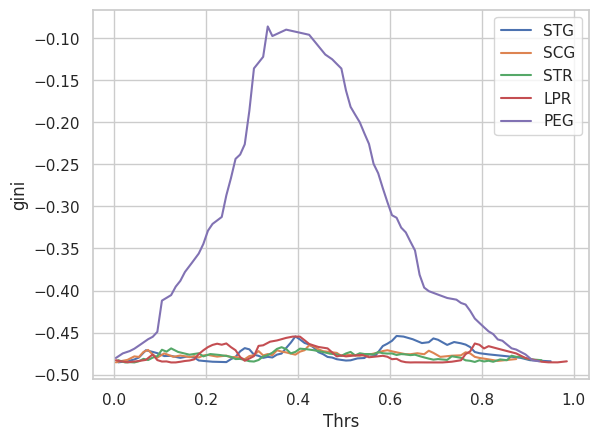

In [11]:
import hw5code
from importlib import reload
from hw5code import find_best_split
from hw5code import DecisionTree
reload(hw5code)
for i in range(len(df.columns) - 1):
    thrs, gini, _, _ = find_best_split(df.iloc[:, i], df.iloc[:, -1])
    plt.plot(thrs, gini, label=df.columns[i])
plt.xlabel('Thrs')
plt.ylabel('gini')
plt.legend()
plt.show()

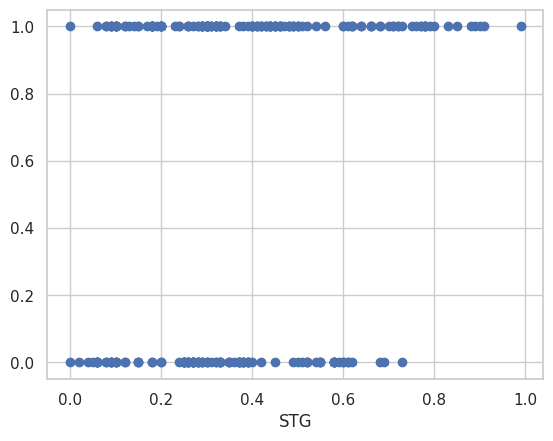

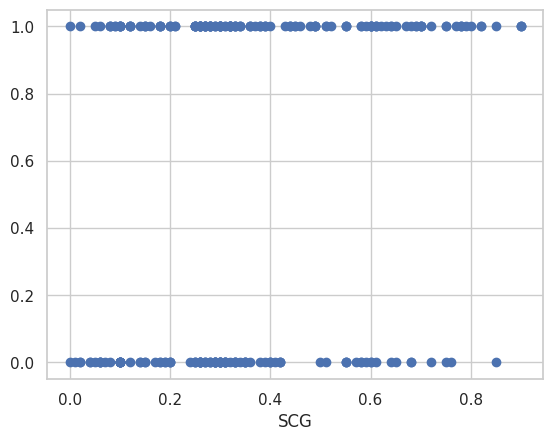

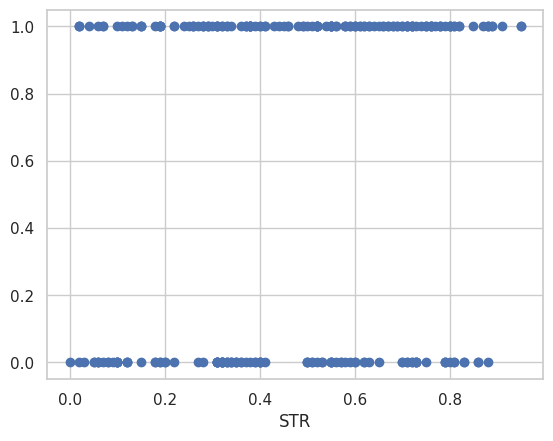

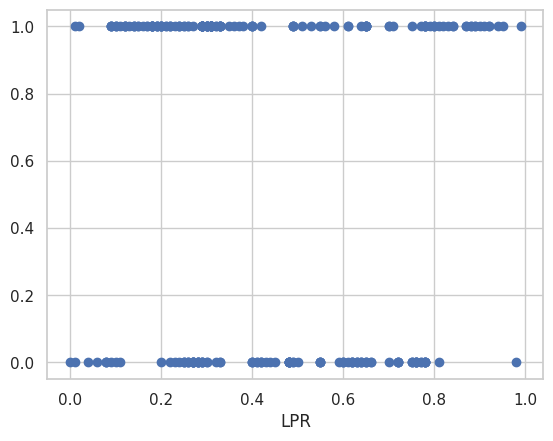

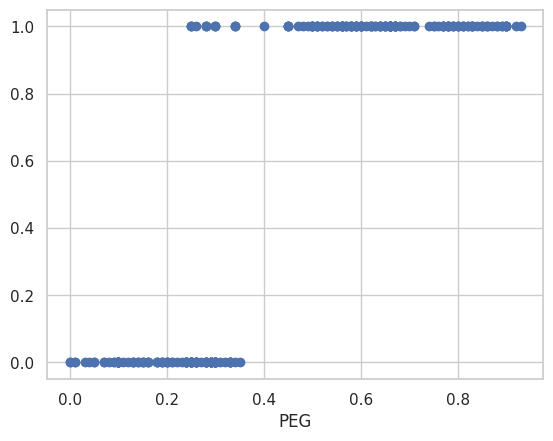

In [12]:
for i in range(len(df.columns) - 1):
    plt.scatter(df.iloc[:, i], df.iloc[:, -1])
    plt.xlabel(df.columns[i])
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Легко заметить, что PEG очень хорошо разделяет признаки по классам, это видно как на первом, так и на втором графике. На 2 графике все зависит от выбора порога. Поэтому на первом графике легко нашелся такой порог при котором gini довольно большой

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [15]:
df.loc[df['p'] == 'p', 'p'] = 0
df.loc[df['p'] == 'e', 'p'] = 1
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,1,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,1,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,0,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [16]:
y_train

array([0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       2, 2, 2, 2])

In [17]:
reload(hw5code)

<module 'hw5code' from '/home/fpsarmin/hw5code.py'>

In [19]:
from sklearn.preprocessing import LabelEncoder
X, y = df.iloc[:, 1:], df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
f_types = ["categorical"] * (df.columns.size - 1)
dt = DecisionTree(f_types)
dt.fit(X_train.apply(LabelEncoder().fit_transform).values, np.array(y_train).astype(np.int))
y_pred = dt.predict(X_test.apply(LabelEncoder().fit_transform).values)
print(accuracy_score(np.array(y_test).astype(np.int), y_pred))

1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [20]:
df = list()
df.append(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')) # 0 mushroom
df.append(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')) # 1 tic-tac-toe
df.append(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')) # 2 car
df.append(pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')) # 3 nursery

In [21]:
df[0].loc[df[0]['p'] == 'p', 'p'] = 0
df[0].loc[df[0]['p'] == 'e', 'p'] = 1
df[0].iloc[:, 1:] = df[0].iloc[:, 1:].apply(LabelEncoder().fit_transform)

df[1].loc[df[1]['positive'] == 'positive', 'positive'] = 1
df[1].loc[df[1]['positive'] == 'negative', 'positive'] = 0
df[1].iloc[:, :-1] = df[1].iloc[:, :-1].apply(LabelEncoder().fit_transform)

df[2].loc[df[2]['unacc'] == 'unacc', 'unacc'] = 0
df[2].loc[df[2]['unacc'] == 'acc', 'unacc'] = 0
df[2].loc[df[2]['unacc'] == 'good', 'unacc'] = 1
df[2].loc[df[2]['unacc'] == 'vgood', 'unacc'] = 1
df[2].iloc[:, :-1] = df[2].iloc[:, :-1].apply(LabelEncoder().fit_transform)

df[3].loc[df[3]['recommend'] == 'recommend', 'recommend'] = 0
df[3].loc[df[3]['recommend'] == 'not_recom', 'recommend'] = 0
df[3].loc[df[3]['recommend'] == 'very_recom', 'recommend'] = 1
df[3].loc[df[3]['recommend'] == 'priority', 'recommend'] = 1
df[3].loc[df[3]['recommend'] == 'spec_prior', 'recommend'] = 1
df[3].iloc[:, :-1] = df[3].iloc[:, :-1].apply(LabelEncoder().fit_transform)

pframe = pd.DataFrame()


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for i in range(4):
    types_ = ['real'] * (len(df[i]) - 1)
    X = None
    y = None
    if i == 0:
        X = df[i].iloc[:, 1:].values
        y = np.array(df[0].iloc[:, 0]).astype(int)
    else:
        X = df[i].iloc[:, :-1].values
        y = np.array(df[i].iloc[:, -1]).astype(int)
    t = DecisionTree(types_)
    clf = make_pipeline(t)
    pframe.loc[i, 'real'] = np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for i in range(4):
    types_ = ['categorical'] * (len(df[i]) - 1)
    X = None
    y = None
    if i == 0:
        X = df[i].iloc[:, 1:].values
        y = np.array(df[0].iloc[:, 0]).astype(int)
    else:
        X = df[i].iloc[:, :-1].values
        y = np.array(df[i].iloc[:, -1]).astype(int)
    t = DecisionTree(types_)
    clf = make_pipeline(t)
    pframe.loc[i, 'categorical'] = np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for i in range(4):
    types_ = ['real'] * (len(df[i]) - 1)
    X = None
    y = None
    if i == 0:
        X = pd.get_dummies(df[i].iloc[:, 1:], sparse=False).values
        y = np.array(df[0].iloc[:, 0]).astype(int)
    else:
        X = pd.get_dummies(df[i].iloc[:, :-1], sparse=False).values
        y = np.array(df[i].iloc[:, -1]).astype(int)
    t = DecisionTree(types_)
    clf = make_pipeline(t)
    pframe.loc[i, 'real ohe'] = np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))


ValueError: There is unknown feature type

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: